# INFO 2950 Final Project 

## Fund Investment Decisions: Mutual Funds or Exchange Traded Funds?

By Cameron Robinson (ctr48) , David Vilensky (dlv46) , Cassandra Kaufman (cpk57) , and Emily Sobel (es983)

## Introduction

The difference between ETF's and Mutual Funds has been an ongoing and unanswered question of many-- specifically our group members. The stock market has always peaked our interest, but we did not feel that we had the knowledge to make sound investments. When researching the stock market, a question that we frequently found ourselves asking was, "what is the difference between Exchangce Traded Funds and Mutual Funds?" In summary, the difference is that Mutual funds usually are actively managed to buy or sell assets within the fund in an attempt to beat the market and help investors profit. ETFs are mostly passively managed, as they typically track a specific market index. This only helped us to gain a broader knowledge of the two funds, but left us lacking knowledge that would help us to make sound investments. We saw this project as an opportunity to gain this knowledge that we seak and analyze the true differences in investing between these two funds. 
 
The first idea that we wanted to look into was the success of each of these types of funds on their own: what makes an Exchange Traded Fund successful and what makes a Mutual Fund successful? After gaining sufficient data on this topic, we wanted to then look at the differences between the two. Where do ETF's succeed where Mutual Funds are not able to and vice versa. After exploring the potential differences in the success of these funds, we want to see if the successes of these funds can be predicted. In order to do that, we need to see what variables of our data factor into the success of each of these funds. After discovering these variables, we can see if we can find a way to use these newfound measures of success to predict the success of a Mutual Fund or ETF. 

 __Research Question:__

What set of criteria is most important to the sucess of a mutual fund? What about amongst ETFs? Which type of fund is more successful overall can can the success of a fund be accurately predicted based on these observed criteria?

## Importing

In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

## Data Overview



The file contains 24,821 Mutual Funds and 1,680 ETFs with general aspects (as Total Net Assets, management company and size), portfolio indicators (as cash, stocks, bonds, and sectors), returns (as yeartodate, 2020-11) and financial ratios (as price/earning, Treynor and Sharpe ratios, alpha, and beta). This data was scraped from Yahoo Finance by kaggle user Stefano Leone.

Link to dataset: https://www.kaggle.com/stefanoleone992/mutual-funds-and-etfs


__Exchange Traded Funds Dataset: 'ETFs.csv'__


In [2]:
df_etf=pd.read_csv('USData/ETFs.csv')

__Mutual Funds Dataset: 'Mutual Funds.csv'__

In [3]:
df_mf=pd.read_csv('USData/Mutual Funds.csv')

/Users/caseykaufman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (167,171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Description

The two datasets used were created to allow for multiple comparisons regarding portfolio decisions from investment managers in Mutual Funds and portfolio restrictions to the indexes in Exchnage traded funds. Each of the datasets are composed of publicly available information and were not funded by any companies or private organizations. The instances in each of the datasets are  funds with the respective fund type, either Exchange traded funds in the ETF.csv or Mutual funds in the Mutual Funds.csv. The columns in each of the datasets contain information on the respective fund's financial ratios, sector investments, risk ratios, and returns. The data in each of the datasets was collected over a time period between 2011 and 2020. The original datasets don't have any errors but they do contain null information in the form of empty columns that were dropped during our data cleaning. This preprocessing and all other preprocessing of the data found in the two datasets is extensively documented in our data cleaning section and we have made no additional modifications or alterations to the data. The creator of the datasets placed no copyrights or restrictions on their use and under its license of CC0: Public Domain, we have permission to access and use its both of the datsets content for our project. 
 

## Data Cleaning

Since our datasets are rather large, we created a method that allowed us to break down and sort either dataset based off keywords in column names : 

In [4]:
### Creates and returns a subset of df_mf by keeping only the columns with 'keyword' in their column name. 
def cleanbykeyword(df,keyword):
    """
    Searches and creates a list of all of the column names in df that contain the keyword.
    Subsets the df according to this list, then creates a df_new dataframe with this 
    information and drops the corresponding columns from the original df.

    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
        
        
    Return: dataframe containing data matching keyword.
    """
    col_list=[ i for i in df.columns if (keyword in i)] 
    #print(col_list)
    df_new=df[col_list]
    df.drop(columns=col_list,axis=1,inplace=True) #removes duplicate data from df_mf masterframe
    df_new.insert(0,'fund_symbol',df.fund_symbol) #inserts the fund symbols as the 1st column of the new data set
    return (df_new)

Throwing away empty columns and columns not used in our analysis: 

In [5]:
empty_cols2 = [col for col in df_etf.columns if df_etf[col].isnull().all()]
df_etf.drop(empty_cols2,
        axis=1,
        inplace=True)

throwaway_cols=[
    'quarters_up',
    'quarters_down',
    'top10_holdings',
    'years_up',
    'years_down',
    'currency'
]
df_mf.drop(columns=throwaway_cols,axis=1,inplace=True)
df_etf.drop(columns=throwaway_cols[2:],axis=1,inplace=True)

df_etf.to_csv('NoEmptiesETFs.csv',index=False)
df_mf.to_csv('NoEmptiesMutual Funds.csv',index=False)



Removing category data from the dataframe. Some of the category columns were not updated properly in the data set and therefore cannot be used in our analyses, we drop them to save space:

In [6]:
df_mf_category_data=cleanbykeyword(df_mf,'category_')
df_etf_category_data=cleanbykeyword(df_etf,'category_')

__Using our clean by keyword method to break the dataframe into more easily accessible parts:__

In [7]:
#standard deviation
df_mf_standard_deviations= cleanbykeyword(df_mf,'standard_deviation')
df_etf_standard_deviations=cleanbykeyword(df_etf,'standard_deviation')

df_etf_standard_deviations.to_csv('stdsETFs.csv',index=False)
df_mf_standard_deviations.to_csv('stdsMutual Funds.csv',index=False)

#sector
df_mf_sector=cleanbykeyword(df_mf,'sector')
df_etf_sector=cleanbykeyword(df_etf,'sector')

df_etf_sector.to_csv('sectorsETFs.csv',index=False)
df_mf_sector.to_csv('sectorsMutual Funds.csv',index=False)

#ratios
df_mf_ratios=cleanbykeyword(df_mf,'_ratio')
df_etf_ratios=cleanbykeyword(df_etf,'_ratio')

df_etf_ratios.to_csv('ratiosETFs.csv',index=False)
df_mf_ratios.to_csv('ratiosMutual Funds.csv',index=False)
                    
#alpha & beta 
df_mf_alpha=cleanbykeyword(df_mf,'alpha')
df_etf_alpha=cleanbykeyword(df_etf,'alpha')

df_mf_beta=cleanbykeyword(df_mf,'beta')
df_etf_beta=cleanbykeyword(df_etf,'beta')
                    
#credit
df_mf_credit=cleanbykeyword(df_mf,'credit').dropna()
df_etf_credit=cleanbykeyword(df_etf,'credit').dropna()
df_mf_credit.to_csv('creditsMutual Funds.csv',index=False)

#R squared
df_mf_rsquare=cleanbykeyword(df_mf,'squared')
df_etf_rsquare=cleanbykeyword(df_etf,'squared')

#assets
df_mf_asset=cleanbykeyword(df_mf,'asset')
df_etf_asset=cleanbykeyword(df_etf,'asset')

df_etf_asset.to_csv('assetsETFs.csv',index=False)
df_mf_asset.to_csv('assetsMutual Funds.csv',index=False)\
                    
#fund return
df_mf_return_history=cleanbykeyword(df_mf,'_return_')
df_etf_return_history=cleanbykeyword(df_etf,'_return_').dropna()

df_etf_return_history.to_csv('returnsETFs.csv',index=False)
df_mf_return_history.to_csv('returnsMutual Funds.csv',index=False)

    #Adds fund_return_ytd column to main datafrme and removes from return history subframe
df_mf['fund_return_ytd']=df_mf_return_history['fund_return_ytd']
df_etf['fund_return_ytd']=df_etf_return_history['fund_return_ytd']
df_mf_return_history=df_mf_return_history.drop(columns=['fund_return_ytd'])
df_etf_return_history=df_etf_return_history.drop(columns=['fund_return_ytd'])
    
#Removing quarterly data from return history
#cleanbykeyword(df_mf_return_history,'_q')
#cleanbykeyword(df_etf_return_history,'_q')

#merging datasets containing R-Squares, Alpha, and Beta values into a single data set:
df_mf_stats=df_mf_rsquare.merge(df_mf_alpha,how='left')
df_mf_stats=df_mf_stats.merge(df_mf_beta,how='left')
df_mf_stats.to_csv('statsMutual Funds.csv',index=False)
df_mf_stats.head()

df_etf_stats=df_etf_rsquare.merge(df_etf_alpha,how='left')
df_etf_stats=df_etf_stats.merge(df_etf_beta,how='left')
df_etf_stats.to_csv('statsETFs.csv',index=False)


# __ETF SECTION__

## Exploratory analysis on ETFs

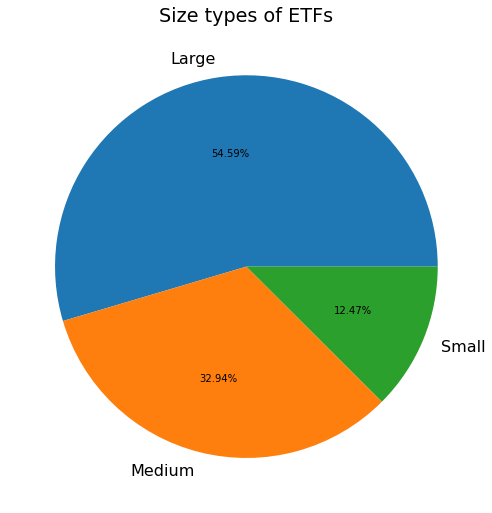

In [54]:
#Basic analysis of ETF distributions
plt.title('Size types of ETFs')
pie_chart(df_etf,'size_type')

This graph shows the percentages of each size fund in our dataset. The size type of the fund tells us how much overall value of the capital held by the exchange trade fund in the current market. Large size means having more value, and small size means less value in the market. According to this graph, our dataset of ETF’s is primarily composed of large sized funds, making up 61.26%. The second highest percentage is the medium sized funds, making up 32.94%, and the smallest sized funds making up the least amount of our dataset with 12.47%. 


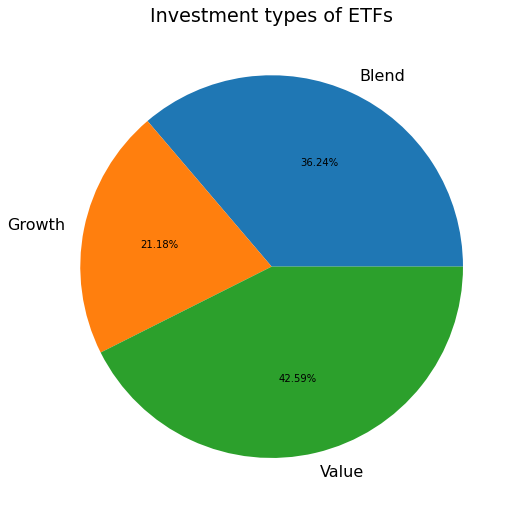

In [52]:
plt.title('Investment types of ETFs')
pie_chart(df_etf,'investment_type')

This graph shows us the percentage breakdown of the investment types in our dataset. There are three investment types of a fund. The growth type is a fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income. 21.18% of the ETF dataset is made up of this type of fund. A value fund follows a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. 42.59% of our ETF dataset is made up of this type of fund. Finally, blend funds, which contain only stocks and no fixed-income securities, are a type of equity fund that holds a mix of both growth stock and value stock. 36.24% of our ETF dataset are made up of this type of fund. 

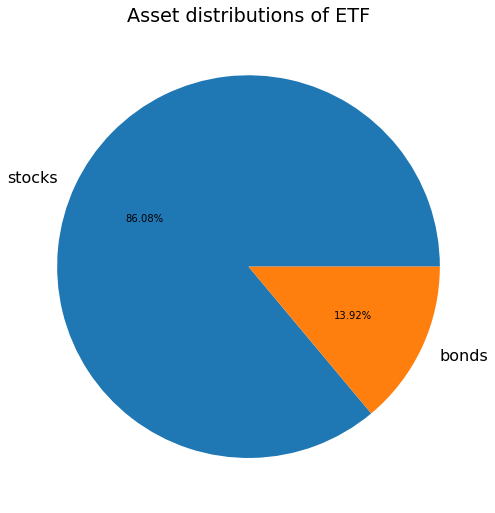

In [22]:
#Asset distribution of ETF
cols=[i for i in df_etf_asset.columns[1:3]]
plt.title("Asset distributions of ETF")
percent_comp_bar(df_etf_asset,cols,'asset_')

This graph shows us the percentages of each type of asset that make up the fund. A distribution is a payment of interest, principal, or dividend by the issuer of the security to investors, and in this graph, the different distributions are stocks and bonds. The majority of the ETF dataset--86.08%-- is made up of the stock distribution, and the remaining 13.29% is the bonds distribution. 

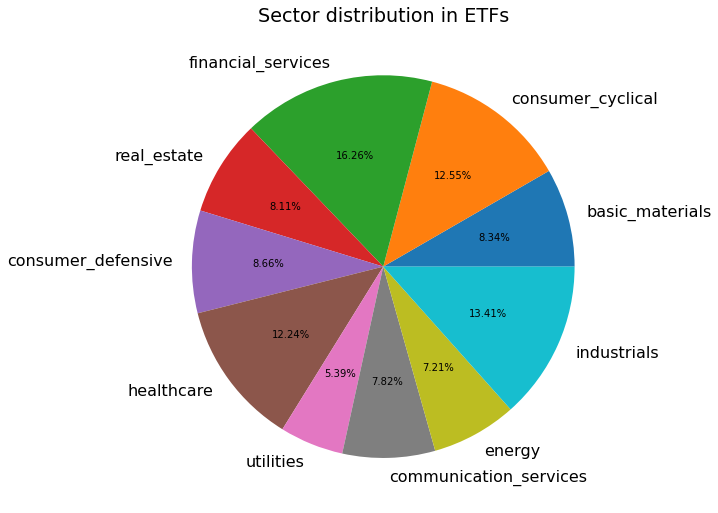

In [55]:
# Percentage invested in each sector in ETF 
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('Sector distribution in ETFs')
percent_comp_bar(df_etf_sector,cols,'sector_')

This graph shows us the distribution of which sector the funds are investing in. The different sectors in the graph tell us which industry the assets are being invested in. For example, 16.26% of this dataset is being invested in the financial services industry-- which is the largest amount of the graph. On the other hand, the smallest amount of the graph is the utilities sector of the graph that tells us that 5.39% of the dataset is investing in the utilities industry. 


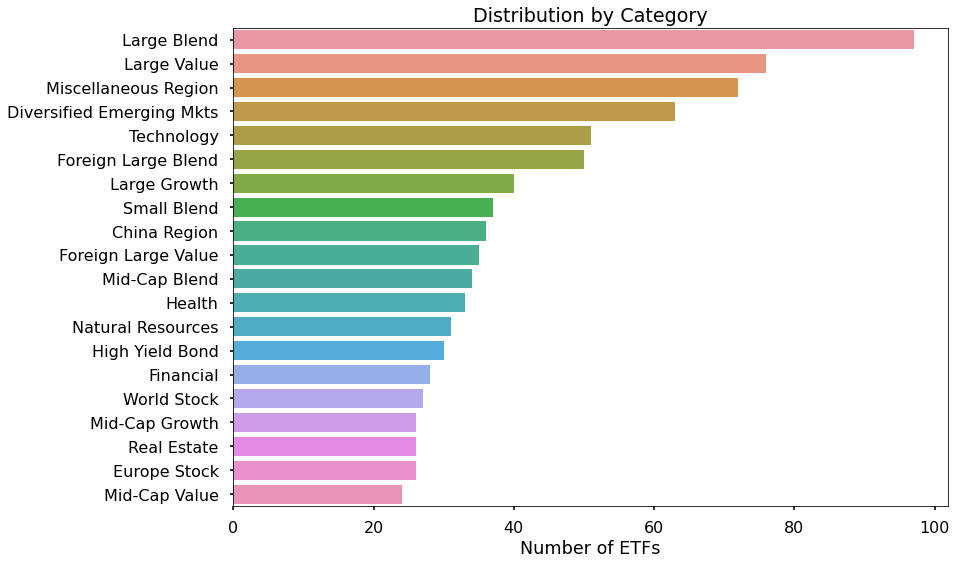

In [26]:
#ETF distribution by category 
plt.xlabel('Number of ETFs')
distribution_by_category(df_etf)

This graph shows us the distribution of the number of funds that make up each category. A fund category is a way of differentiating mutual funds according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics. The largest category of this dataset is the large blend, and the smallest is the mid-cap value. 


 Distribution of fund_alpha_3years according to size_type in ETFs:



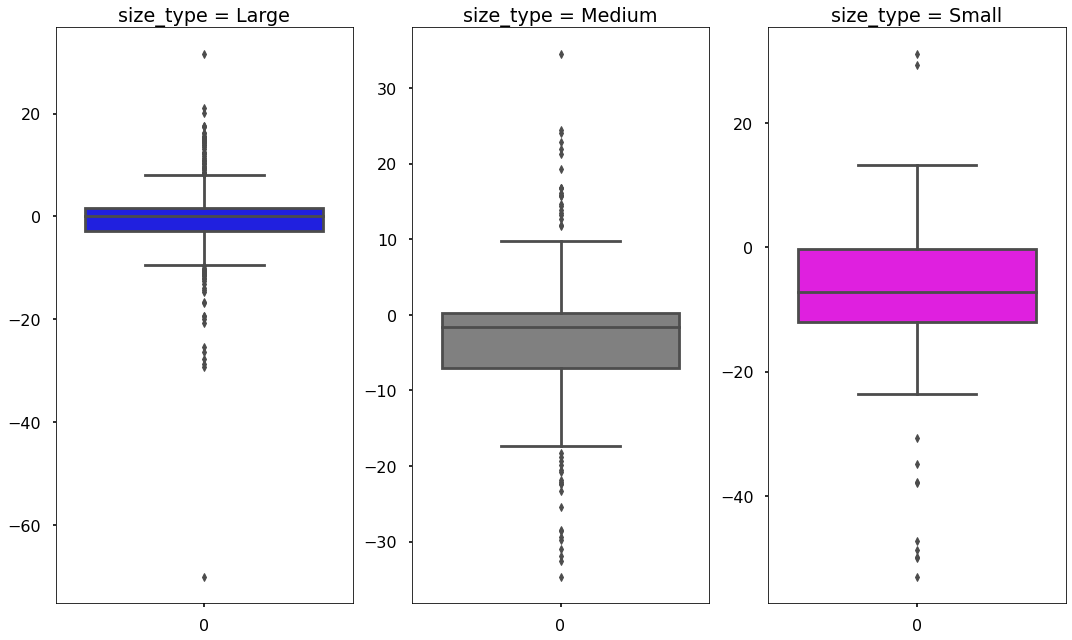

In [28]:
#ETF Fund size vs. alpha 3 years score
joined=pd.merge(df_etf,df_etf_stats)
dep_by_indep_boxplot(joined,'size_type','fund_alpha_3years','ETFs')

This graph shows the distribution of the alpha values of the funds with the corresponding size. The alpha value is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return. We can see from these graphs that the large funds have a distribution that is clustered towards the top, meaning the alpha value is probably overall higher for the large funds. The medium funds have a more evenly distributed alpha value and so do the small funds. 


 Distribution of fund_return_ytd according to investment_type in ETFs:



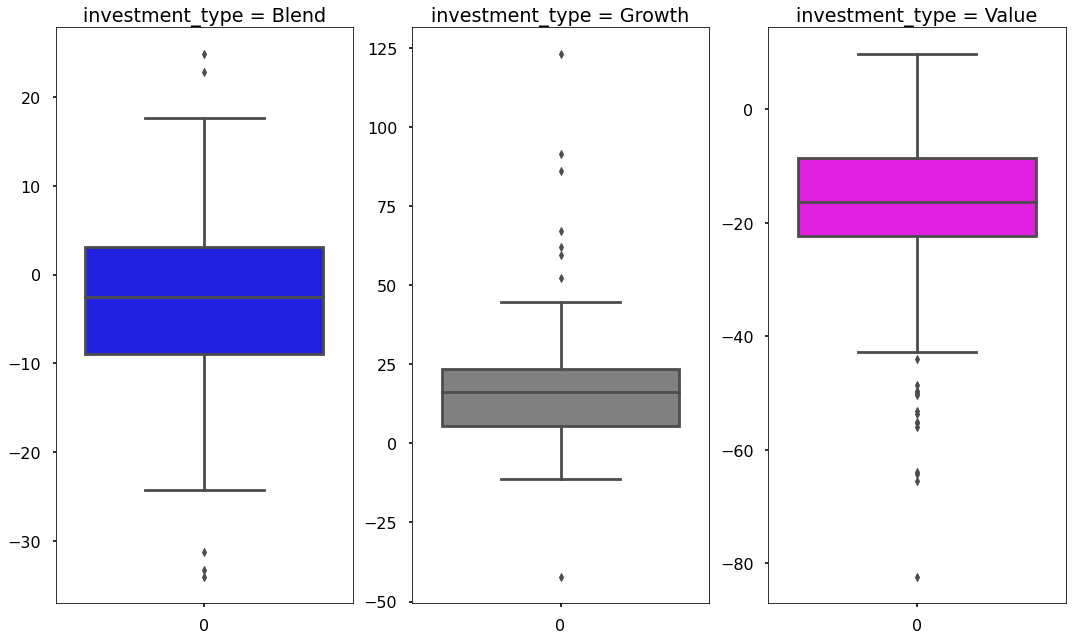

In [29]:
#Investment type vs. ETF YTD return
joined=pd.merge(df_etf,df_etf_return_history)
dep_by_indep_boxplot(joined,'investment_type','fund_return_ytd','ETFs')

This graph shows us the distribution of the fund returns (ytd) based on the investment type of a fund. The blend funds seem to have a very evenly distributed fund return (ytd), while the growth type seems to be a little more skewed towards the lower values of fund return, and the value type seems to be a little skewed towards the higher values of the fund return. 

## Summary Statistics for numeric ETF values

In [43]:
columns = []
means = []
standard_devs = []
medians = []
for cols in df_etf:
    if type(df_etf[cols][0]) == np.float64:
        columns.append(cols)
        means.append(df_etf[cols].mean())
        standard_devs.append(df_etf[cols].std())
        medians.append(df_etf[cols].median())


df_etf_summary_stats = pd.DataFrame()
df_etf_summary_stats['ETF Feature'] = columns
df_etf_summary_stats['Mean'] = means 
df_etf_summary_stats['Standard Deviation'] = standard_devs 
df_etf_summary_stats['Median'] = medians 

df_etf_summary_stats

,ETF Feature,Mean,Standard Deviation,Median
0,fund_yield,2.453672,2.247477,2.030
1,fund_return_ytd,-3.506176,20.005713,-3.595


## ETF ANALYSIS

In [51]:
#Creates two new dataframes where only the highest correlated variables are stored
df_etf_highest_corrs=pd.DataFrame(index=['Correlation'])

#Removes NaNs from fund return column
df_etf.dropna(subset=['fund_return_ytd'],inplace=True)

# __MUTUAL FUND SECTION__

## Exploratory analysis on Mutual Funds

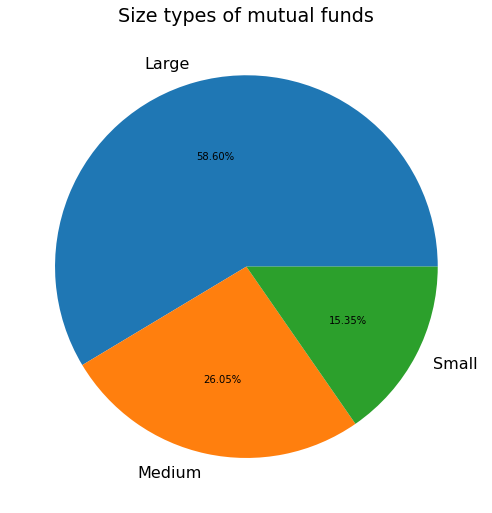

In [56]:
#Basic analysis of mutual fund distributions
plt.title('Size types of mutual funds')
pie_chart(df_mf,'size_type')

This graph shows the percentages of each size fund in our dataset. The size type of the fund tells us how much overall value of the capital held by the exchange trade fund in the current market. Large size means having more value, and small size means less value in the market. According to this graph, our dataset of Mutual Funds is primarily composed of large sized funds, making up 58.60%. The second highest percentage is the medium sized funds, making up 26.05%, and the smallest sized funds making up the least amount of our dataset with 15.35% 

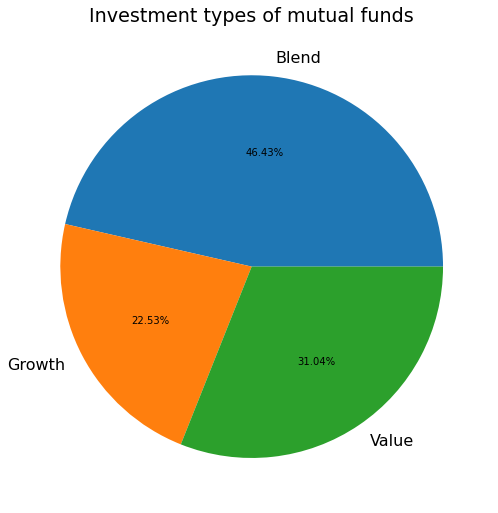

In [57]:
plt.title('Investment types of mutual funds')
pie_chart(df_mf,'investment_type')

This graph shows us the percentage breakdown of the investment types in our dataset. There are three investment types of a fund. The growth type is a mutual fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income. 22.53% of the Mutual Fund dataset is made up of this type of fund. A value fund follows a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. 31.04% of our Mutual Fund dataset is made up of this type of fund. Finally, blend funds, which contain only stocks and no fixed-income securities, are a type of equity fund that holds a mix of both growth stock and value stock. 46.43% of our Mutual Fund dataset is made up of this type of fund. 

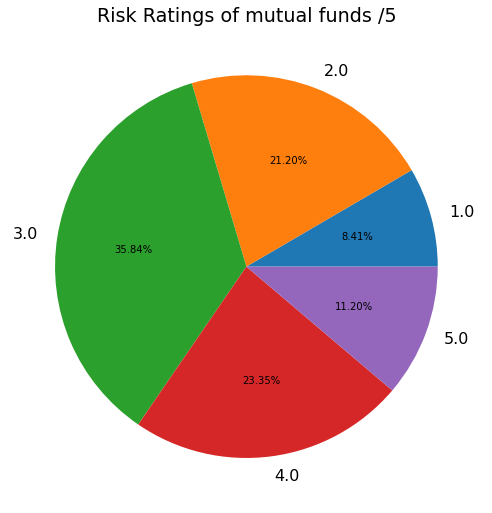

In [59]:
plt.title('Risk Ratings of mutual funds /5')
pie_chart(df_mf,'risk_rating')

This graph shows the breakdown of the risk ratings of the Mutual Funds in the data set. A risk rating is assessing the risks involved in the daily activities of a business, and in this case, assessing it on a scale from one to five. The risk ratings depends on the likelihood of the risk event occurring and the severity of the impact on the business and its employees. The most prominent risk rating in our Mutual Fund dataset is 3.0, making up 35.84% of the dataset, and the least prominent is 1.0 making up 8.41% of the dataset. 

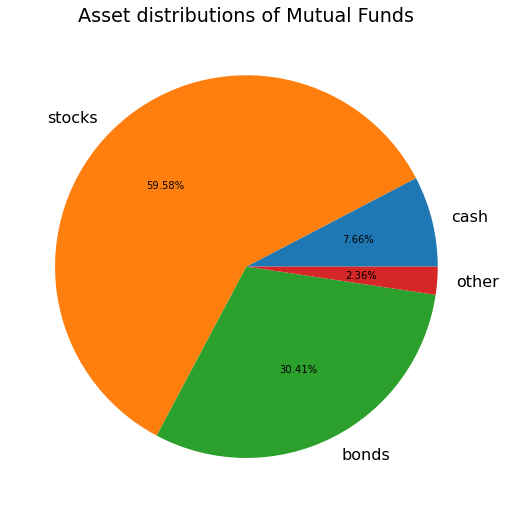

In [34]:
#asset distribution of Mutual Funds
cols=[i for i in df_mf_asset.columns[1:7]]
plt.title("Asset distributions of Mutual Funds")
percent_comp_bar(df_mf_asset,cols,'asset_')

This graph shows us the percentages of each type of asset that make up the fund. A distribution is a payment of interest, principal, or dividend by the issuer of the security to investors, and in this graph, the different distributions are stocks, bonds, cash, and other. The majority of the Mutual Fund dataset--59.58%-- is made up of the stock distribution, while the minority asset distribution is the other section, making up 2.36% is the bonds distribution. A not much greater minority is the 7.66% being the cash sector.  

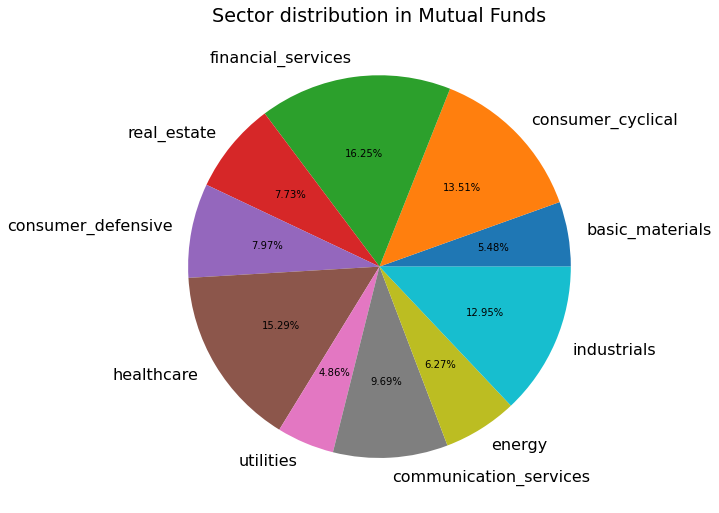

In [36]:
#Percentage invested in each sector in Mutual Funds 
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('Sector distribution in Mutual Funds')
percent_comp_bar(df_mf_sector,cols,'sector_')

This graph shows us the distribution of which sector the funds are investing in. The different sectors in the graph tell us which industry the assets are being invested in. In this case, 16.25% of this dataset is being invested in the financial services industry-- which is the largest amount of the graph. On the other hand, the smallest amount of the graph is the utilities sector of the graph that tells us that 4.86% of the dataset is investing in the utilities industry. 

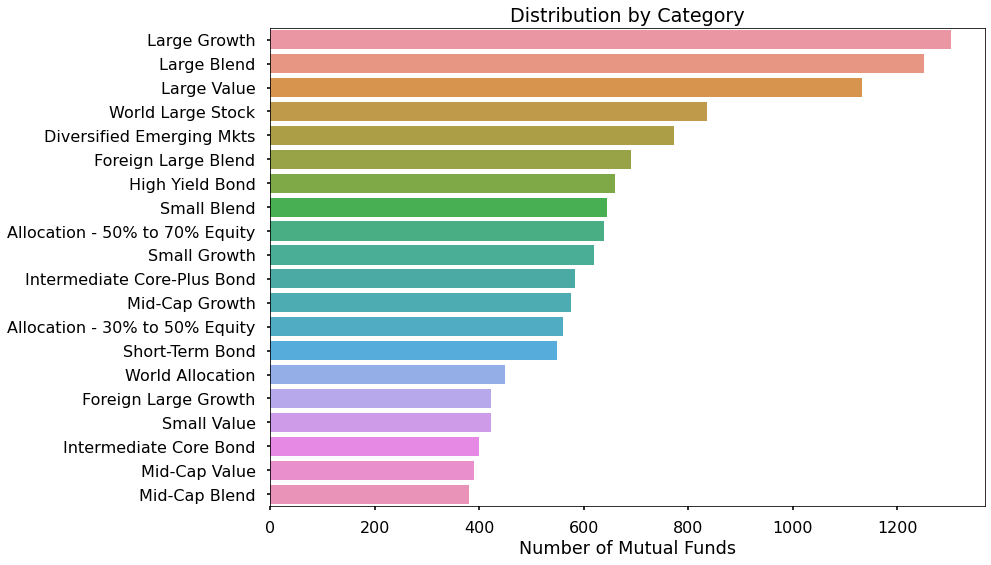

In [37]:
#Mutual funds distribution by category 
plt.xlabel('Number of Mutual Funds')
distribution_by_category(df_mf)

This graph shows us the distribution of the number of funds that make up each category. A fund category is a way of differentiating ETF’s according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics. The largest category of this dataset is the large growth-- with large blend close behind-- and the smallest is the mid-cap blend. 



 Distribution of price_earnings_ratio according to risk_rating in Mutual Funds:



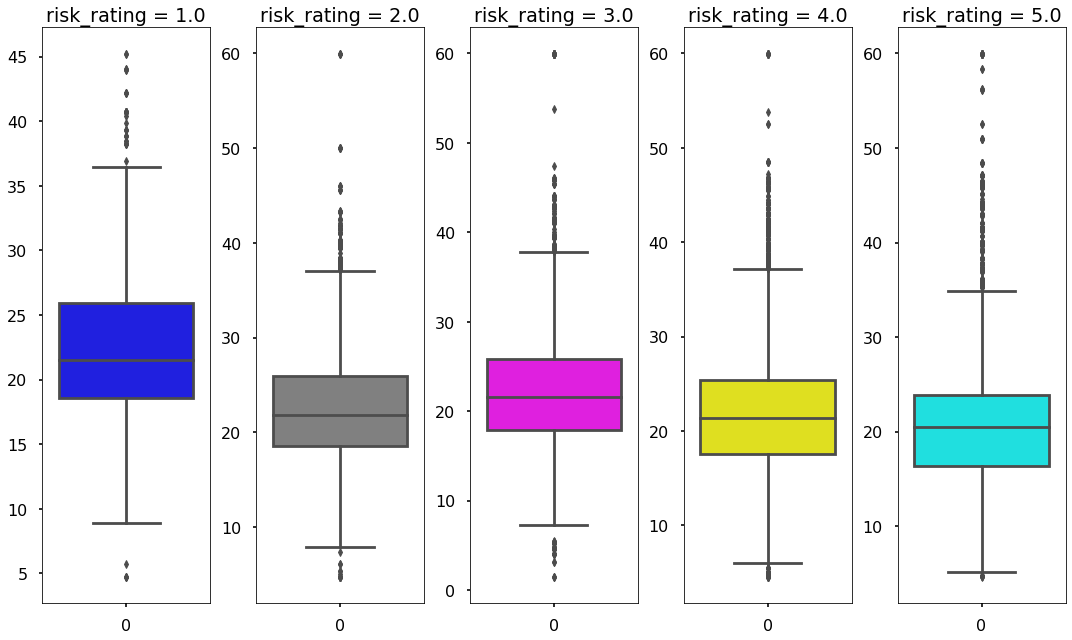

In [38]:
#Price earnings ratio vs. risk rating for Mutual Funds
joined=pd.merge(df_mf,df_mf_ratios)
dep_by_indep_boxplot(joined,'risk_rating','price_earnings_ratio','Mutual Funds')

This graph shows a box and wisker plot for each price book ratio values for each group of risk ratings. The price-to-book ratio, or P/B ratio, is a financial ratio used to compare a company's current market value to its book value. This graph plots the price book ratio values for the distributions of each risk rating. Based on this graph, as the risk rating goes up, it seems like that the distribution of the price book ratio goes down, forming somewhat of a downward trend with the boxes.  


 Distribution of fund_alpha_3years according to size_type in Mutual Fund:



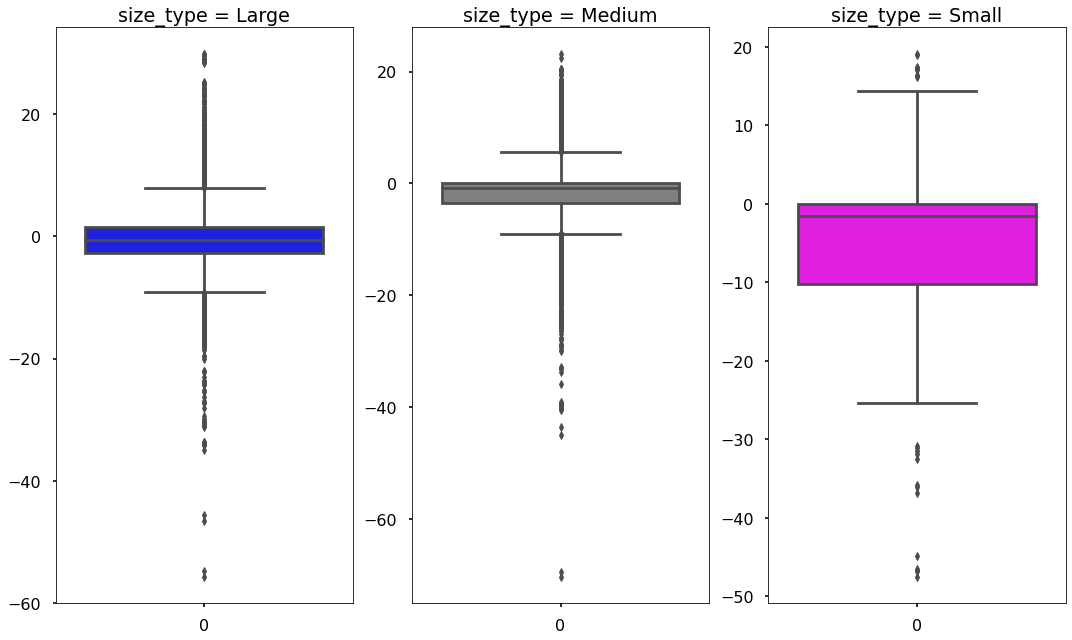

In [40]:
#Mutual Fund size vs. alpha 3 years value
joined=pd.merge(df_mf,df_mf_stats)
dep_by_indep_boxplot(joined,'size_type','fund_alpha_3years','Mutual Fund')

This graph shows the distribution of the alpha values of the funds with the corresponding size. The alpha value is often considered to represent the value that a portfolio manager adds or subtracts from a fund portfolio's return. We can see from these graphs that the medium funds have a distribution that is clustered towards the top, meaning the alpha value is probably overall higher for the large funds. The large and small sizes also seem to be clustered towards the top, just not as high as the medium.


 Distribution of fund_return_ytd according to investment_type in Mutual Fund:



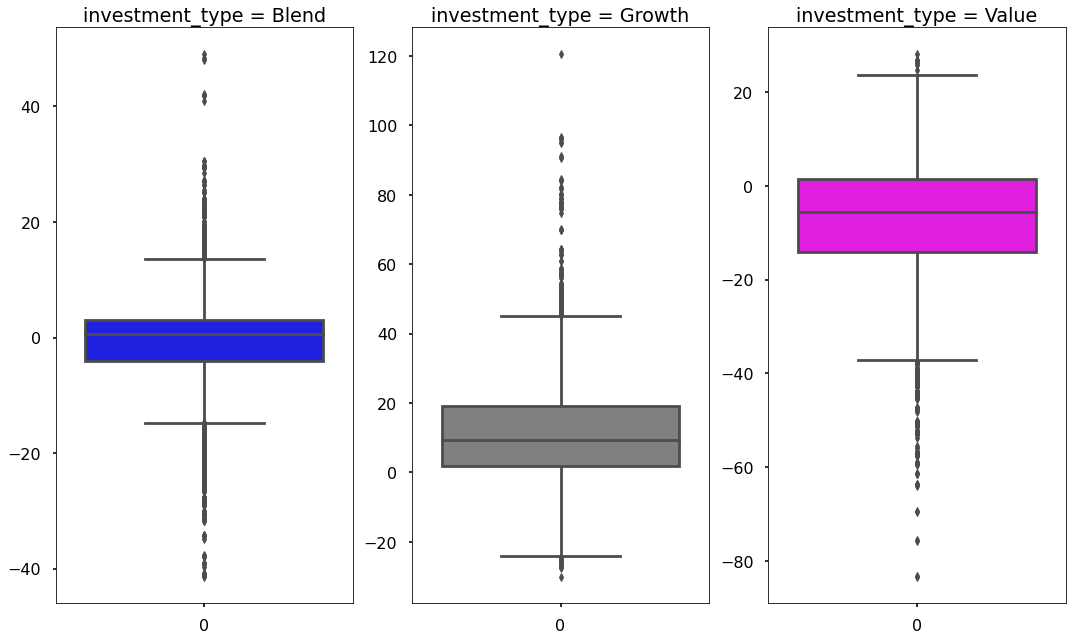

In [41]:
#Investment type vs. mutual fund YTD return
joined=pd.merge(df_mf,df_mf_return_history)
dep_by_indep_boxplot(joined,'investment_type','fund_return_ytd','Mutual Fund')

This graph shows us the distribution of the fund returns (ytd) based on the investment type of a fund. The blend funds seem to have a very evenly distributed fund return (ytd), while the growth type seems to be a little more skewed towards the lower values of fund return, and the value type seems to be a little skewed towards the higher values of the fund return-- very similar to the ETF graph. 

## Summary Statistics for numeric Mutual Fund values

In [42]:
columns = []
means = []
standard_devs = []
medians = []
for cols in df_mf:
    if type(df_mf[cols][0]) == np.float64:
        columns.append(cols)
        means.append(df_mf[cols].mean())
        standard_devs.append(df_mf[cols].std())
        medians.append(df_mf[cols].median())

df_mf_summary_stats = pd.DataFrame()
df_mf_summary_stats['MF Feature'] = columns
df_mf_summary_stats['Mean'] = means 
df_mf_summary_stats['Standard Deviation'] = standard_devs 
df_mf_summary_stats['Median'] = medians 

df_mf_summary_stats

,MF Feature,Mean,Standard Deviation,Median
0,rating,3.032126,1.102552,3.00
1,return_rating,3.024296,1.101567,3.00
2,risk_rating,3.076363,1.106091,3.00
3,median_market_cap,39238.487202,51251.055463,20772.24
4,bond_maturity,5.570877,2.546605,6.07
5,bond_duration,3.716140,1.663970,3.45
6,fund_yield,1.908593,3.230563,1.62
7,fund_return_ytd,-0.168995,12.525788,0.77


## MF ANALYSIS 

Comparing the correlation of the different Mutual Fund variables with the 10 year fund return. We are doing this to see which variables are more greatly correlated with the fund returns of Mutual Funds. 

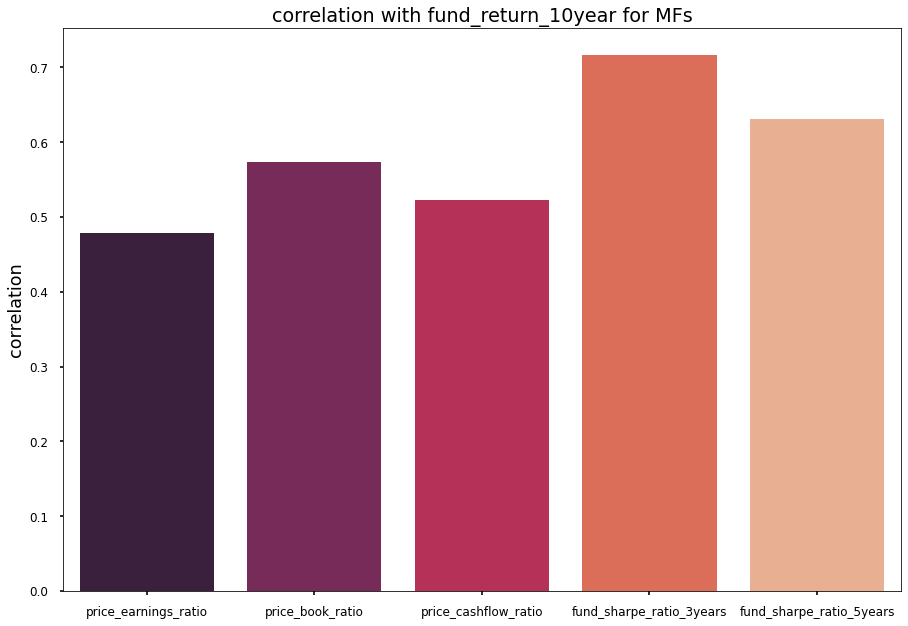

In [49]:
#Creates two new dataframes where only the highest correlated variables are stored
df_mf_highest_corrs=pd.DataFrame(index=['Correlation'])

#Removes NaNs from fund return column
df_mf.dropna(subset=['fund_return_ytd'],inplace=True)

joined=pd.merge(df_mf,df_mf_ratios).dropna()

predictors=['median_market_cap', 'bond_maturity', 'bond_duration', 'fund_yield',
        'fund_net_annual_expense_ratio', 'price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'fund_sharpe_ratio_3years', 'fund_sharpe_ratio_5years',
       'fund_sharpe_ratio_10years']


df_corrs=get_correlations(joined,predictors,'fund_return_ytd')
filter_correlations(df_corrs,df_mf_highest_corrs)
corr_visualize(df_corrs,'fund_return_10years',.35,'correlation with fund_return_10year for MFs',12)



# Methods Used Section

Methods used for data exploration:

In [8]:
#creates a pie chart representing the relative distribution of funds in a certain category 
def pie_chart(df,column):
    '''
    Param df: Pandas dataframe
    Param column: column in df that is to be analyzed.
    '''
    grouped=df.groupby(column).fund_symbol.count().to_frame()
    plt.pie(grouped.fund_symbol,labels=grouped.index,autopct='%.2f%%')
    plt.show()


In [9]:
#creats a pie chart representing the % composition of a certain range of values in a dataset.
def percent_comp_bar(df,cols,keyword):
    """
    Creates a pie chart for a given DataFrame subset. Each section in the pie chart
    represents a column mean within the dataframe, which corresponds to a % invested
    in a given category (sector/asset)
    
    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
    """
    col_names=[]
    other=0
    col_sums=[]
    for column in cols:
        col_sum=df[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names.append(column.replace(keyword,''))
            col_sums.append(df[column].mean())
    if(other>0.1):
        col_names.append('other')
        col_sums.append(other)
    plt.pie(col_sums,labels=col_names,autopct='%.2f%%') 
    plt.show()


In [10]:
#Draws a boxplot representing the dependent column as a function of the independent column
def dep_by_indep_boxplot(df_joined,independent,dependent,fundtype):
    '''
    Param df_joined: dataframe containing both the independent and dependent columns
    Param independent: column which serves as the independent variable
    Param dependent: column which serves as the dependent variable which is analyzed and plotted according to the dependent column.
    Param fundtype: Name of fund that is printed at the start of execution.
    '''
    
    print('\n Distribution of {} according to {} in {}'.format(dependent,independent,fundtype)+':\n')

    colors=['blue','grey','magenta','yellow','cyan','orange']    
    criteria=[i for i in df_joined[independent].sort_values(ascending=True).dropna().unique()]
    col_count=len(criteria)
    table=df_joined.melt(id_vars=[independent],value_vars=[dependent]).dropna()
    
    fig,ax=plt.subplots(nrows=1,ncols=col_count,figsize=(15,9))
    for i in range(0,col_count):
        sns.boxplot(data=table.where(table[independent]==criteria[i]).value,ax=ax[i],color=colors[i])
        ax[i].set_title(independent + ' = ' + str(criteria[i]))
        plt.tight_layout()
    plt.show()
    

In [11]:
#Creates a bar plot of the 20 most common values in the given column
def distribution_by_category(df):
    '''
    Param df: dataframe of funds containing category type.
    
    '''
    cat_count=df['category'].value_counts()[:20]
    sns.barplot(x=cat_count.values,y=cat_count.index)
    plt.title('Distribution by Category')
    plt.tight_layout
    plt.show()

Methods used for analysis: 

In [12]:
## returns a data frame of the correlations of the variables in the 'predictors' array with the 'independentVariable' in the data frame 'df'
def get_correlations(df,predictors,independentVariable):
    
    #Scaling columns with discrete variables
    scaled = StandardScaler().fit_transform(df[predictors])
    df[predictors]=scaled
    
    df_corr=pd.DataFrame(index=['correlation'],columns=predictors)
    for predictor in predictors:
        model=LinearRegression().fit(df[[predictor]],df[independentVariable])
        correlation=model.score(df[[predictor]],df[independentVariable])
        df_corr[predictor]=round(correlation,4)
        
    return df_corr.T

In [13]:
## filters the correlations in the data frame 'df_corrs' and adds the correlations greater than .10
## pass in 'df_mf_highest_corrs' or 'df_etf_highest_corrs' in the variable 'df_high_corrs' for respective fund types
def filter_correlations(df_corrs,df_high_corrs):
    for i in df_corrs.index:
        corr=df_corrs.loc[i,'correlation']
        if (corr>.10 or corr <-.10):
                df_high_corrs[i]=corr

In [14]:
## Generates a bar plot of the correlations in the data frame 'df_corr' that have correlations greater than the value 'cutoff' 
## the plot is titled 'title' and has index labels of font size 'labelsize'
def corr_visualize(df_corr,independentVariable,cutoff,title,labelsize):
    df_cutoffs=df_corr[df_corr['correlation']>cutoff]
    sns.barplot(x=df_cutoffs.index,y=df_cutoffs['correlation'],palette='rocket')
    plt.title(title)
    plt.tick_params(labelsize=labelsize)
    plt.tight_layout()


Methods used for hypothesis testing 

In [44]:
def contingency(data1,data2):
    '''
    This is a helper function for the chi_test function. 
    This function makes a contingency table of two different lists of data and 
    does a chi squared test for association on the data 
    '''
    
    contingency = np.zeros((4,4))
    
    if len(data1) < len(data2):
        num = len(data1)
    else:
        num = len(data2)
    
    for x in range(num):
        if data1[x] != 5 and data2[x] != 5:
            a = data1[x]
            b = data2[x]
            contingency[a-1,b-1] = contingency[a-1,b-1] + 1

    cont = pd.DataFrame(contingency)
    print(cont)
    print("This table shows us how many of each values are in each section of the overall ranges")
    print('\n')
    
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(contingency)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and the two groups are dependent on one another')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and the two groups are independent of one another')

In [45]:
def chi_test(df1,df2,col1,col2):
    '''
    This function is used to do a chi squared test test for independence on two columns in two given dataframes.
    This function primarily recodes two numeric columns in a dataframe to categorical values.
    '''
    
    r = df1[col1]
    array1_nan = np.array(r)

    array1 = []
    for x in array1_nan:
        if 0/x == 0:
            array1.append(x)

    min1  = np.quantile(array1,.0)
    q1_1 = np.quantile(array1,.25)
    median1 = np.quantile(array1,.5)
    q3_1 = np.quantile(array1,.75)
    max1 = np.quantile(array1,1)

    recoded_col1 = []
    for x in range(len(array1_nan)): 
        if min1<= array1_nan[x] < q1_1 :
            recoded_col1.append(1)
        elif q1_1<= array1_nan[x] < median1:
            recoded_col1.append(2)
        elif median1<= array1_nan[x] < q3_1:
            recoded_col1.append(3)
        elif q3_1<= array1_nan[x] <= max1:
            recoded_col1.append(4)
        else:
            recoded_col1.append(5)


    z = df2[col2]
    array2_nan = np.array(z)
    
    array2 = []
    for x in array2_nan:
        if 0/x == 0:
            array2.append(x)

    min2  = np.quantile(array2,.0)
    q1_2 = np.quantile(array2,.25)
    median2 = np.quantile(array2,.5)
    q3_2 = np.quantile(array2,.75)
    max2 = np.quantile(array2,1)

    recoded_col2 = []
    for x in range(len(array2_nan)): 
        if min2<= array2_nan[x] < q1_2 :
            recoded_col2.append(1)
        elif q1_2<= array2_nan[x] < median2:
            recoded_col2.append(2)
        elif median2<= array2_nan[x] < q3_2:
            recoded_col2.append(3)
        elif q3_2<= array2_nan[x] <= max2:
            recoded_col2.append(4)
        else:
            recoded_col2.append(5)
    contingency(recoded_col1, recoded_col2)

In [46]:
def two_samp_t(df1,df2,col1,col2):
    '''
    This method performs a two sample t-test for two given columns in the given dataframes
    '''
    x = df1[col1]
    y = df2[col2]
    from scipy.stats import ttest_ind

    stat, pval = ttest_ind(x,y,nan_policy='omit')
    #less if h1/x<h2/y
    #more if h1>h2
    print('The test statistic for this two sample t-test is: '+str(stat))
    print('The p-value of this two sample t-test is: '+str(pval))
    print('\n')
    
    alpha = 0.05
    if pval <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and there is a difference in the means of each of the groups')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and there is not a difference in the means of each group')

__Analysis of sectors of investment:__

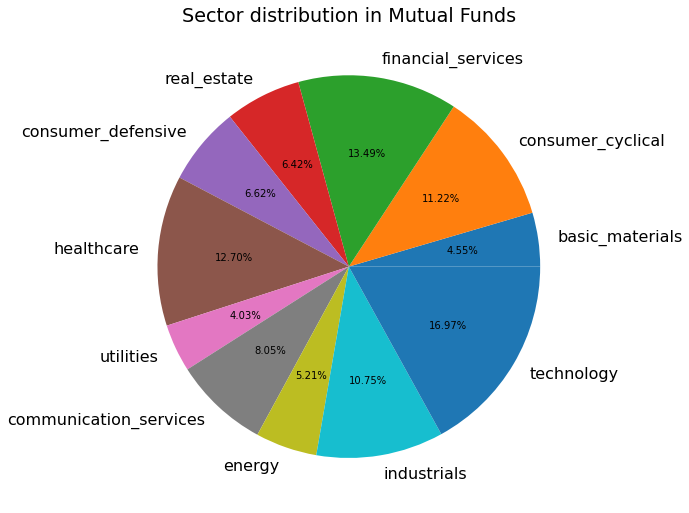

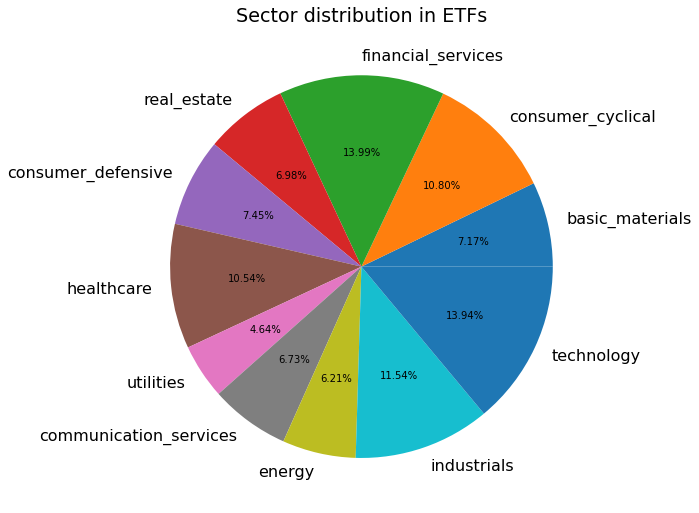

In [15]:
# Percentage invested in each sector
cols=[i for i in df_mf_sector.columns[1:12]]
plt.title('Sector distribution in Mutual Funds')
percent_comp_bar(df_mf_sector,cols,'sector_')
print('\n')
plt.title('Sector distribution in ETFs')
percent_comp_bar(df_etf_sector,cols,'sector_')




As we can see from the bar charts, the average sector holdings between both Mutual Funds and Exchange Traded Funds are very similar. The biggest margin of difference in sector holdings is about 3%. The biggest differences between sector holdings are that ETF's seem to have a 3% greater investment in companies in the basic materials sector and Mutual funds have roughly a 3% greater involvement in technology,healthcare, and communication services. We will perform a regression to see how correlated percent investment in each financial sector is with fund returns and if this slight difference in sector investment has an impact on fund returns.

Doing a single regression on sector investment and fund returns:

In [16]:
sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']

mfjoined=pd.merge(df_mf,df_mf_sector).dropna()
mfjoined=mfjoined.merge(df_mf_return_history).dropna()

mfs=get_correlations(mfjoined,sectors,'fund_return_ytd')


etfjoined=pd.merge(df_etf,df_etf_sector).dropna()
etfjoined=etfjoined.merge(df_etf_return_history).dropna()

etfs=get_correlations(etfjoined,sectors,'fund_return_ytd')





Cleaning up the column names: 

In [17]:

names=['Materials','Consumer Cyclical','Financial Services','Real Estate','Communication services','Energy','Industrials','Technology','Healthcare']
mfs.set_axis(names,axis=0,inplace=True)
etfs.set_axis(names,axis=0,inplace=True)


Visualizing the correlations with mutual funds:

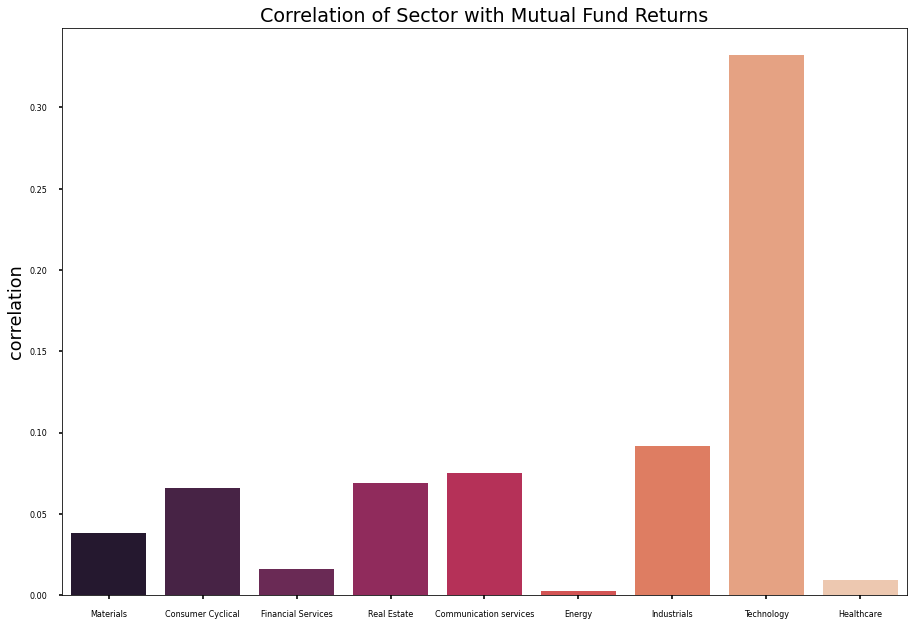

In [18]:
corr_visualize(mfs,'fund_return_ytd',.001,'Correlation of Sector with Mutual Fund Returns',8)

visualizing the correlation with ETFs:

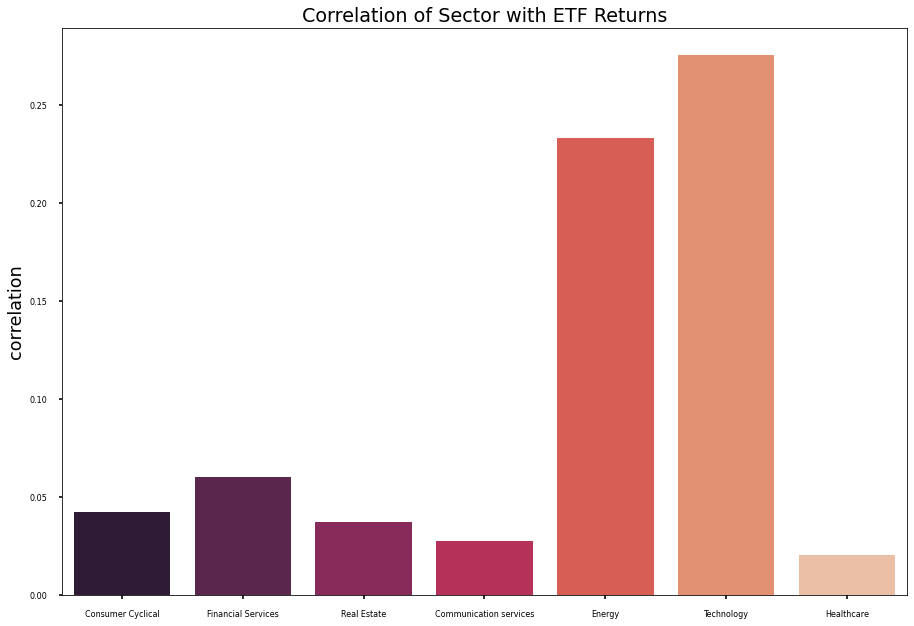

In [19]:
corr_visualize(etfs,'fund_return_ytd',.001,'Correlation of Sector with ETF Returns',8)


Visualizing the Correlations side by side:

(0.01, 0.4)

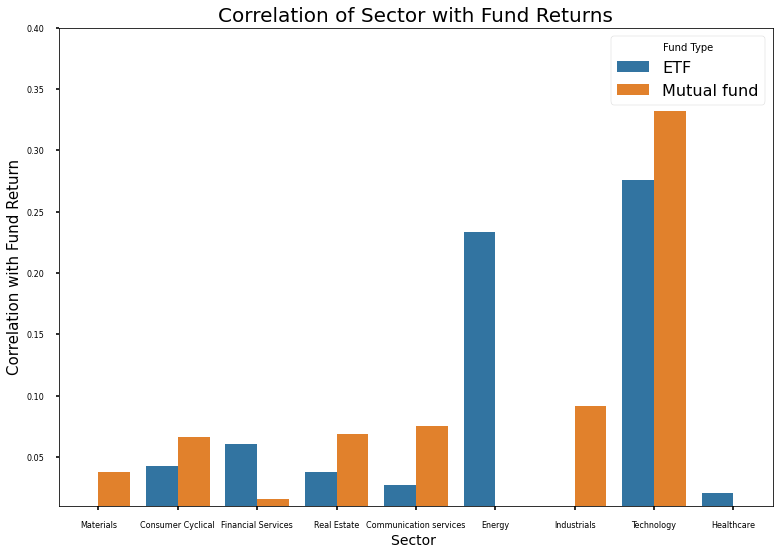

In [20]:
mfs['Fund Type']='Mutual fund'
etfs['Fund Type']='ETF'


sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']
bothsects=pd.concat([etfs,mfs])
g=sns.barplot(x=bothsects.index,y=bothsects['correlation'],data=bothsects,hue='Fund Type')
plt.tick_params(labelsize=8)

plt.title("Correlation of Sector with Fund Returns", fontsize = 20)
plt.xlabel("Sector ", fontsize = 14)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
g.set_ylim(.01,.40)

As we can see from the visualization, sector investment generally has a positive and very weak correlation with fund returns. The highest correlation between sector investment and fund return is for technology investments. While this correlation is the strongest, it has a weak to moderate postitive correlation with fund returns with an r value of only .30 for ETFs and .35 for Mutual Funds. A shocking discovery is that investments in the energy sector is weakly to moderatetly correlated with fund returns for ETFs and not at all correlated to returns in Mutual Funds! In our breakdown of sector investment differences between Mutual Funds and ETFs we noted that Mutuals Funds invested more in technology,health care,and communication sectors and ETFs invested more in the basic materials sector. In our correlations we can see that investment in any of these sectors, besides the technology sector, had almost no correlation with fund returns. The differences in fund returns on a whole for Mutual Funds and ETFs then cannot be generally attributed to a difference in investment sectors.


Investors who have a positive outlook on energy stocks and want that sector to be well represented in the fund portfolio should likely look to invest in ETFs over Mutual Funds. Investment in the energy sector seemingly generates no returns for Mutual funds, and this could possibly be contributed to a variety of differences in the structure of mutual fund management. ETFs might have the advantage of allowing very diverse investment within the energy sector and are more likely to capture the rewards from the sector as a whole, while Mutual Funds may pick and choose certain energy companies they want to invest in - and they must have picked these companies poorly over the last decade. The overwhelming success of energy stocks such as Tesla have been downplayed and heavily shorted by fund managers, and this may explain why Mutual Funds don't seem to generate as much returns from the energy sector as ETFs do.

## Conclusion:

Apart from energy stocks it seems there is no concrete reason for a investor to choose investment in ETF over Mutual Funds or vice versa based solely on the investors desired sectors of investment. In the case that the investor is looking to invest in a fund with the hopes of capturing returns from the energy sector and energy stocks in particular, they should choose to invest in an ETF or other similar index fund over a Mutual Fund